# Multiple regression

## 01 Import libraries

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split  # train test data
from sklearn.linear_model import LinearRegression  # 01 import prediction model
from sklearn.metrics import mean_squared_error # evaluation of model
from collections import OrderedDict # dict subclass that remembers the order entries were added
#%matplotlib inline

## 00 Prepare data

In [45]:
from crime_dataset_headers import * 
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
df_crime = pd.read_csv(data_url, header=None, names=headers, na_values='?', index_col='communityname') #
df_crime.head()

,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
communityname,,,,,,,,,,,,,,,,,,,,,
Lakewoodcity,8,NaN,NaN,1,0.19,0.33,0.02,0.90,0.12,0.17,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
Tukwilacity,53,NaN,NaN,1,0.00,0.16,0.12,0.74,0.45,0.07,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
Aberdeentown,24,NaN,NaN,1,0.00,0.42,0.49,0.56,0.17,0.04,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
Willingborotownship,34,5.0,81440.0,1,0.04,0.77,1.00,0.08,0.12,0.10,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
Bethlehemtownship,42,95.0,6096.0,1,0.01,0.55,0.02,0.95,0.09,0.05,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [ ]:
# Selecting whitch columns to use for input features and output target
feature_names = ['householdsize', 'pctUrban', 'medIncome', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp']
target_name = ['ViolentCrimesPerPop']

In [ ]:
# Getting data of selected varaibles from the dataframe. Sklearn can work directly with pandas dataframe
X = df_crime[feature_names]
y = df_crime[target_name]

In [46]:
# Features
X.head()

,householdsize,pctUrban,medIncome,racepctblack,racePctWhite,racePctAsian,racePctHisp
communityname,,,,,,,
Lakewoodcity,0.33,1.0,0.37,0.02,0.90,0.12,0.17
Tukwilacity,0.16,1.0,0.31,0.12,0.74,0.45,0.07
Aberdeentown,0.42,0.0,0.30,0.49,0.56,0.17,0.04
Willingborotownship,0.77,1.0,0.58,1.00,0.08,0.12,0.10
Bethlehemtownship,0.55,0.9,0.50,0.02,0.95,0.09,0.05


In [47]:
# Target
y.head()

,ViolentCrimesPerPop
communityname,
Lakewoodcity,0.20
Tukwilacity,0.67
Aberdeentown,0.43
Willingborotownship,0.12
Bethlehemtownship,0.03


In [ ]:
# Split data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## 02 Create an instance of a prediction model

In [ ]:
# Create an instance of a Linear Regression model
linear_regression_model = LinearRegression() # Pass any argument

## 03 Train model

In [100]:
linear_regression_model.fit(X_train, y_train)

LinearRegression()

## 04 Evaluate model

In [101]:
# Get prediction of the model for the data it has not seen (testing)
y_pred_test = linear_regression_model.predict(X_test)
error_metric = mean_squared_error(y_pred=y_pred_test, y_true=y_test)
print('The Mean Squared Error of this model is: ', error_metric)

The Mean Squared Error of this model is:  0.024515126105646268


In [51]:
# Compare with train mean squared error
y_pred_train = linear_regression_model.predict(X_train)
error_metric_train = mean_squared_error(y_pred=y_pred_train, y_true=y_train)
print('The Mean Squared Error of this model is: ', error_metric_train)

The Mean Squared Error of this model is:  0.02289421582936789


We see the training mean squared error is smaller than the testing error which is expected

In [74]:
# Print coefficients and intercept for the multiple regression model
print('Trained regression model inercept: ', linear_regression_model.intercept_)
print('Trained regression model coefficients: ' ,linear_regression_model.coef_)

Trained regression model inercept:  [0.45577599]
Trained regression model coefficients:  [[-0.19278548  0.06045006 -0.21005033  0.34482546 -0.25271318  0.00694937
   0.23234394]]


Text(0.5, 1.0, 'Predicted vs. Actual values')

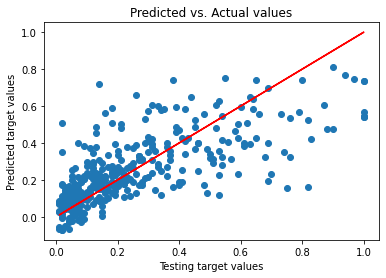

In [56]:
# Plot thae prediction
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test)
ax.plot(y_test, y_test, color='red')
ax.set_xlabel('Testing target values')
ax.set_ylabel('Predicted target values')
ax.set_title('Predicted vs. Actual values')

## 05 Make predictions

In [71]:
# Create data for new area where our model will be used
new_data = OrderedDict([
    ('householdsize', 0.5),
    ('pctUrban', 0.6),
    ('medIncome', 0.1),
    ('racepctblack', 0.1),
    ('racePctWhite', 0.6),
    ('racePctAsian', 0.1),
    ('racePctHisp', 0.2)
])
print('Shape new_data: ', pd.Series(new_data).shape)
# Values reshape (1, -1) because it must be 2-dim because we passed only one new observation
new_data = pd.Series(new_data).values.reshape(1, -1) # (1, -1) means 1 row and -1 means the rest of the observations as columns 
print('Shape new_data after reshape: ', new_data.shape)

# Use the model to make predictions 
predict_new_data = linear_regression_model.predict(new_data)
print('Predicted new target value: ', predict_new_data)

Shape new_data:  (7,)
Shape new_data after reshape:  (1, 7)
Predicted new target value:  [[0.30466662]]


For a society with the characteristic as in the new data the predicted crimes per population is 0.305